# Visualisation of Performance of Quantum Ensemble (Sec.5.3)

## Results

In [1]:
import sys
sys.path.insert(1, '../')

from Utils import *
from modeling import *

c:\users\anton\appdata\local\programs\python\python37\lib\site-packages\matplotlib\__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


In [2]:
data = pd.read_csv('output/results_ensemble.csv', 
                   names = ['N', 'n_train', 'n_swap', 'd', 'balanced', 
                            'test_size', 'dev', 'accuracy', 'brier', 'seed'])
data['B']=2**data.d
ctrl_size = data.d.unique()
std_all = data.dev.unique()
data = data[data.dev!=.2]

In [3]:
data = data.drop_duplicates()

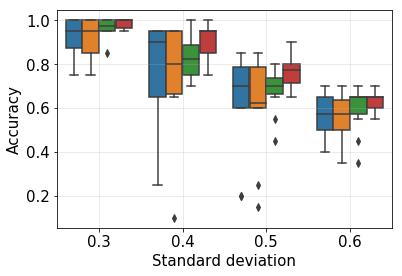

In [4]:
ax = sns.boxplot(x="dev", y="accuracy", hue="d", data=data)
plt.xlabel('Standard deviation', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(alpha=.3)
plt.gca().get_legend().remove()
plt.savefig('output/results_accuracy.png', bbox_inches='tight')
plt.show()

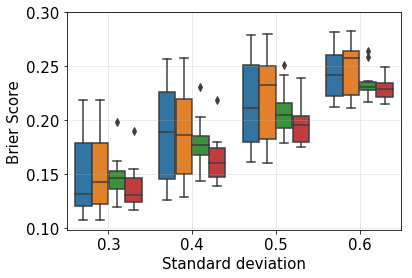

In [5]:
ax = sns.boxplot(x="dev", y="brier", hue="d", data=data)
plt.grid(alpha=.3)
plt.xlabel('Standard deviation', fontsize=15)
plt.ylabel('Brier Score', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks([.10, .15, .20, .25, .30],fontsize=15)
plt.gca().get_legend().remove()
plt.savefig('output/results_brier.png', bbox_inches='tight')
plt.show()

In [6]:
# ax = sns.boxplot(x="dev", y="brier", hue="d", data=data)
fig = plt.figure(figsize=(6, 1))
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='center', ncol=4)
plt.savefig('output/legend_performance.png', dpi=150, bbox_inches='tight')
plt.show()

<Figure size 432x72 with 0 Axes>

## Data

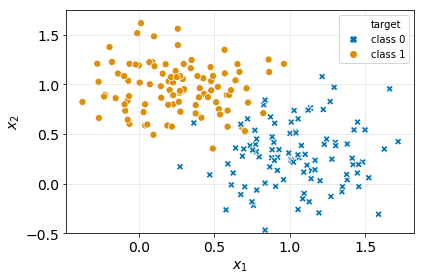

In [7]:
import sys
sys.path.insert(1, '../')

from Utils import *
from modeling import *

X,y = load_data(200, std=.3, save=False, plot=False)
data = pd.concat([pd.DataFrame(X), pd.DataFrame(y)], axis = 1)
data.columns = [r'$x_1$', r'$x_2$', 'classes']

data.classes = ['class '+str(y) for y in data.classes]

data.columns = [r'$x_1$', r'$x_2$', 'target']
sns.scatterplot(x="$x_1$", y="$x_2$", hue="target",
              data=data, palette='colorblind', legend='brief',
               markers=['X','o'], style='target', s=50)
plt.grid(alpha=.3)
plt.ylim(-.5, 1.75)

plt.xlabel('$x_1$',fontsize=14)
plt.ylabel('$x_2$',fontsize=14)

plt.tick_params(axis='both',labelsize=14)
plt.tight_layout()
plt.savefig('output/data_paper.png', dpi=300, bbox_inches='tight')

In [8]:
# # ax = sns.boxplot(x="dev", y="brier", hue="d", data=data)
# fig = plt.figure(figsize=(6, 1))
# handles, labels = ax.get_legend_handles_labels()
# fig.legend(handles, labels, loc='center', ncol=4)
# plt.savefig('output/legend_Full.png', dpi=300, bbox_inches='tight')
# plt.show()

## Results as Table (mean and std)

In [9]:
data = pd.read_csv('output/results_ensemble.csv', 
                   names = ['N', 'n_train', 'n_swap', 'd', 'balanced', 
                            'test_size', 'dev', 'accuracy', 'brier', 'seed'])

# data = data.loc[data['dev'] == .3,:]
data_mean =data.groupby(['dev', 'd']).mean()
data_std =data.groupby(['dev', 'd']).std()

data_mean['accuracy_std'] = data_std.accuracy
data_mean['brier_std'] = data_std.brier
data_mean

N  n_train  n_swap  test_size  accuracy     brier         seed  \
dev d                                                                       
0.3 1  200.0      2.0     1.0        0.1  0.920000  0.148862  3864.300000   
    2  200.0      4.0     1.0        0.1  0.910000  0.152620  3864.300000   
    3  200.0      8.0     1.0        0.1  0.965000  0.147305  3864.300000   
    4  200.0      8.0     1.0        0.1  0.985000  0.137711  3864.300000   
0.4 1  200.0      2.0     1.0        0.1  0.766667  0.187854  3784.444444   
    2  200.0      4.0     1.0        0.1  0.750000  0.187647  3864.300000   
    3  200.0      8.0     1.0        0.1  0.835000  0.178632  3864.300000   
    4  200.0      8.0     1.0        0.1  0.895000  0.164297  3864.300000   
0.5 1  200.0      2.0     1.0        0.1  0.620000  0.216691  3864.300000   
    2  200.0      4.0     1.0        0.1  0.605000  0.221880  3864.300000   
    3  200.0      8.0     1.0        0.1  0.680000  0.208191  3864.300000   
    4  200.0      8.0     1.0        0.1  0.765000  0.195983  3864.300000   
0.6 1  200.0      2.0     1.0        0.1  0.570000  0.244039  3864.300000   
    2  200.0      4.0     1.0        0.1  0.550000  0.247788  3864.300000   
    3  200.0      8.0     1.0        0.1  0.595000  0.234858  3864.300000   
    4  200.0      8.0     1.0        0.1  0.630000  0.228860  3864.300000   

       accuracy_std  brier_std  
dev d                           
0.3 1      0.097872   0.038905  
    2      0.099472   0.036545  
    3      0.046169   0.021688  
    4      0.023508   0.021606  
0.4 1      0.226222   0.045427  
    2      0.257519   0.042500  
    3      0.102726   0.024534  
    4      0.087208   0.022835  
0.5 1      0.230788   0.042393  
    2      0.227631   0.040627  
    3      0.105631   0.023337  
    4      0.069016   0.018875  
0.6 1      0.103110   0.024510  
    2      0.110024   0.024618  
    3      0.108700   0.014543  
    4      0.041039   0.011321

In [10]:
data_mean.reset_index(inplace=True)
data_mean

,dev,d,N,n_train,n_swap,test_size,accuracy,brier,seed,accuracy_std,brier_std
0,0.3,1,200.0,2.0,1.0,0.1,0.920000,0.148862,3864.300000,0.097872,0.038905
1,0.3,2,200.0,4.0,1.0,0.1,0.910000,0.152620,3864.300000,0.099472,0.036545
2,0.3,3,200.0,8.0,1.0,0.1,0.965000,0.147305,3864.300000,0.046169,0.021688
3,0.3,4,200.0,8.0,1.0,0.1,0.985000,0.137711,3864.300000,0.023508,0.021606
4,0.4,1,200.0,2.0,1.0,0.1,0.766667,0.187854,3784.444444,0.226222,0.045427
5,0.4,2,200.0,4.0,1.0,0.1,0.750000,0.187647,3864.300000,0.257519,0.042500
6,0.4,3,200.0,8.0,1.0,0.1,0.835000,0.178632,3864.300000,0.102726,0.024534
7,0.4,4,200.0,8.0,1.0,0.1,0.895000,0.164297,3864.300000,0.087208,0.022835
8,0.5,1,200.0,2.0,1.0,0.1,0.620000,0.216691,3864.300000,0.230788,0.042393
9,0.5,2,200.0,4.0,1.0,0.1,0.605000,0.221880,3864.300000,0.227631,0.040627


In [ ]:
# f, axes = plt.subplots(1, 2)
# sns.boxplot(x="dev", y="accuracy", hue="d", data=data , ax=axes[0])
# plt.grid(alpha=.3)
# plt.xlabel('Standard deviation')
# plt.ylabel('Brier Score')
# # plt.savefig('output/results_brier.png')
# # plt.show()
# sns.boxplot(x="dev", y="brier", hue="d", data=data, ax=axes[1])

# # ax1 = sns.boxplot(x="dev", y="accuracy", hue="d", data=data)
# # plt.xlabel('Standard deviation')
# # plt.ylabel('Accuracy')
# plt.grid(alpha=.3)
# # plt.savefig('output/results_accuracy.png')
# # plt.show()

# # ax.plot(x, p0_ens, color='orange', label='qEnsemble', zorder=1, linewidth=5)
# # ax.plot(x, p0_avg, color='steelblue', label='qAVG')
# # ax.scatter(x, p0_clas, label='cEnsemble', color='sienna', zorder=2, linewidth=.5)

# # #ax.set_xlim(-1.1, 1.1)
# # # ax.set_ylim(-.2, 1.05)
# # ax.grid(alpha=0.3)
# # ax.set_xticks(np.round(np.arange(0, 21, 5), 1).tolist())
# # ax.set_xlabel('runs')
# # ax.set_ylabel(r'Prob. of state $0$ ($target$ qubit)')


# # ax.set_title('Quantum Simulator', size=12)
# # ax.tick_params(labelsize=10)


# # avg = data_out.qAVG_real
# # ens = data_out.qEns_real
# # clas = data_out.cAVG

# # #ax1 = plt.subplot(222)

# # ax1.plot(x, ens, color='orange', label='qEnsemble', zorder=1, linewidth=5)
# # ax1.plot(x, avg, color='steelblue', label='qAVG')
# # ax1.scatter(x, clas, label='cEnsemble', color='sienna', zorder=2, linewidth=.5)

# # #ax.set_xlim(-1.1, 1.1)
# # # ax.set_ylim(-.2, 1.05)
# # ax1.grid(alpha=0.3)
# # ax1.set_xticks(np.round(np.arange(0, 21, 5), 1).tolist())
# # ax1.set_title('Real Device', size=12)
# # ax1.tick_params(labelsize=10)
# # ax1.set_xlabel('runs')

# # # plt.legend(loc='lower center',# bbox_to_anchor=(0.5, -.15),
# # #           ncol=3, fancybox=True, shadow=True, fontsize = 12)
# # # handles, labels = ax.get_legend_handles_labels()
# # # lgd=fig.legend(handles, labels, loc='lower center', ncol=3, bbox_to_anchor=(0.4, -.025))

# #plt.savefig('output/acc+brier.png', dpi = 300, bbox_inches='tight')
# plt.show()
# # plt.close()


# # fig = plt.figure(figsize=(6, 1))
# # handles, labels = ax.get_legend_handles_labels()
# # fig.legend(handles, labels, loc='center', ncol=3)
# # plt.savefig('output/legend.png', dpi=300, bbox_inches='tight')
# # plt.show()

In [ ]:
# import seaborn as sns

# def plot_ensemble_results(data, palette=[220,10], y_name='accuracy', 
#                           stds = [0.10, .15, 0.20, .25, 0.30],
#                           filename='ensemble_performance.png'):
    
#     # stds = np.array([0.10, .15, 0.20, .25, 0.30])
#     colors = sns.diverging_palette(220, 10, n=5)

#     fig, ax = plt.subplots(1)
#     for i in np.arange(len(stds)):
#         std= stds[i]
#         color = colors[i]
#         y = data.loc[data.dev==std, y_name]
#         x = data.loc[data.dev==std, 'd']
#         #plt.plot(x, y, color='blue',  linewidth=2)
#         ax.plot(x,y, lw=2, label = std, color=color)
#         # ax.fill_between(q, mean + upper, mean - lower, facecolor=color, alpha=0.5)
#         # mean = ((1+ro[1]*(T-1))/T)*err
#         # lower = mean - ((1+ro[0]*(T-1))/T)*err
#         # upper = ((1 + ro[2] * (T - 1)) / T) * err - mean
#         #ax.set_title(r'random walkers empirical $\mu$ and $\pm \sigma$ interval')
#     ax.set_title('Quantum Bagging performance')
#     ax.legend(loc='lower right', title = '$Std$')
#     ax.set_xlabel('Number of control qubits ($d$)')
#     ax.set_ylabel(y_name)
#     ax.grid(alpha=0.3)
#     ax.legend(bbox_to_anchor=(1.01, 1.05), title = '$Std$')
#     plt.savefig('output/' + filename, dpi =300)
#     plt.show()

In [ ]:
# plot_ensemble_results(data, palette=[220,10], y_name='accuracy', 
#                           stds = [0.10, .15, 0.20, .25, 0.30],
#                           filename='acc_ensemble_performance.png')

## Quantum Ensemble as Simple Averaging - Predictions (Section 5.2)

In [14]:
data_sim = pd.read_csv('output/sim_results.csv')
out_sim = data_sim.values.tolist()

In [15]:
def plot_cls(predictions,
             #labels=['$f_1$', '$f_2$', '$f_3$', '$f_4$', 'AVG', '$Ensemble$'],
             title='Test point classification',
             file='ens_vs_single.png'):
    fontsize=28
    N = len(predictions)
    fig, ax = plt.subplots(figsize=(12,3))
    plt.rc('text', usetex=True)
    #plt.rc('font', family='serif')
    ind = np.arange(N)  # the x locations for the groups
    width = 0.35  # the width of the bars
    prob_0 = [p[0] for p in predictions]
    prob_1 = [p[1] for p in predictions]
    # label = [l['label'] for l in dictionary]
    pl1 = ax.bar(ind, prob_0, width, bottom=0, color='orange')
    pl2 = ax.bar(ind + width, prob_1, width, bottom=0, color='blue')
    ax.set_title(title, size=fontsize)#, y=0, pad=-65)
    ax.set_xticks(ind + width / 2)
    ax.set_xticklabels([r'$f_1$', r'$f_2$', r'$f_3$', r'$f_4$', 'AVG', 'Ensemble'], size=fontsize)
    ax.set_yticklabels([0.0, 0.2, 0.4, 0.6, 0.8, 1.0],size=fontsize)
    # ax.legend((pl1[0], pl2[0]), (r'$P(\tilde{y}=0)$', r'$P(\tilde{y}=1)$'), prop=dict(size=20))
    ax.autoscale_view()
    plt.ylim(0, 1)
    #plt.xlabel('Classifier', fontsize=18)
    #plt.xlabel(r'$P(\tilde{y})')
    plt.grid(alpha=.2)
    ax.tick_params(pad=10)
    if file is not None:
        plt.savefig('output/' + file + '.png', dpi=200,  bbox_inches='tight')
    plt.show()

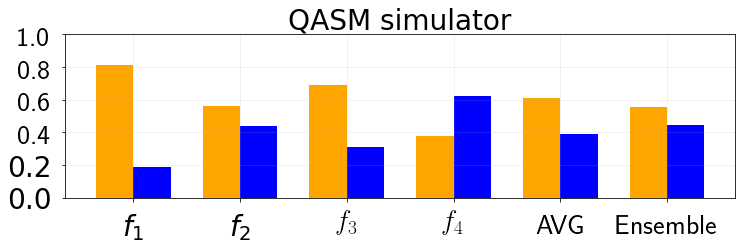

In [16]:
plot_cls(out_sim, title= 'QASM simulator', file='SIM_ens_vs_single')

In [17]:
data_rl = pd.read_csv('output/rl_results.csv')
out_real = data_rl.values.tolist()

In [18]:
def plot_cls(predictions,
             #labels=['$f_1$', '$f_2$', '$f_3$', '$f_4$', 'AVG', '$Ensemble$'],
             title='Test point classification',
             file='ens_vs_single.png'):
    fontsize=28
    N = len(predictions)
    fig, ax = plt.subplots(figsize=(12,3))
    plt.rc('text', usetex=True)
    #plt.rc('font', family='serif')
    ind = np.arange(N)  # the x locations for the groups
    width = 0.35  # the width of the bars
    prob_0 = [p[0] for p in predictions]
    prob_1 = [p[1] for p in predictions]
    # label = [l['label'] for l in dictionary]
    pl1 = ax.bar(ind, prob_0, width, bottom=0, color='orange')
    pl2 = ax.bar(ind + width, prob_1, width, bottom=0, color='blue')
    ax.set_title(title, size=fontsize)#, y=0, pad=-65)
    ax.set_xticks(ind + width / 2)
    ax.set_xticklabels([r'$f_1$', r'$f_2$', r'$f_3$', r'$f_4$', 'AVG', 'Ensemble'], size=fontsize)
    ax.set_yticklabels([0.0, 0.2, 0.4, 0.6, 0.8, 1.0],size=fontsize)
    ax.legend((pl1[0], pl2[0]), (r'$P(\tilde{y}=0|b)$', r'$P(\tilde{y}=1|b)$'), 
              prop=dict(size=fontsize), bbox_to_anchor = (.85, -0.3), ncol=2)
    ax.autoscale_view()
    plt.ylim(0, 1)
    #plt.xlabel('Classifier', fontsize=fontsize)
    #plt.xlabel(r'$P(\tilde{y})')
    plt.grid(alpha=.2)
    ax.tick_params(pad=10)
    if file is not None:
        plt.savefig('output/' + file + '.png', dpi=200,  bbox_inches='tight')
    plt.show()

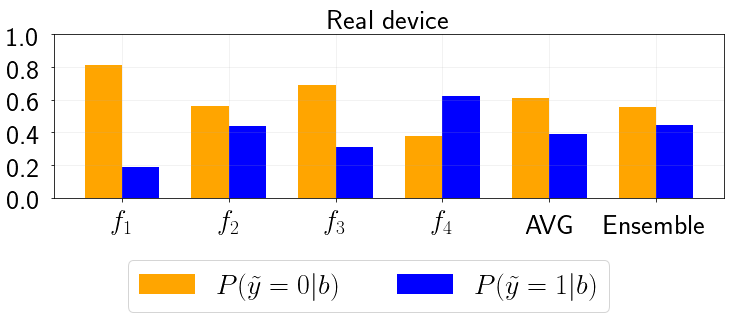

In [19]:
plot_cls(out_real, title='Real device', file='RL_ens_vs_single')